In [2]:
from tcrtrifold.dataset import TriadDataset, filt_to_cognate_thresh

iedb_I_thresh_20 = filt_to_cognate_thresh(
    TriadDataset(
        "../../data/iedb_I/triad/staged/iedb_I.triad.thresh_3.10x_neg.feat.parquet",
        "../../data/iedb_I/pmhc/staged/iedb_I.pmhc.thresh_3.feat.parquet",
    ),
    20,
)

In [17]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from tcrtrifold.eval_utils import within_antigen_auc

featnames = [
    "mean_p_tcr_pae",
    "mean_mhc_tcr_pae",
    "iptm",
    "fraction_disordered",
    "ranking_score",
    "peptide_mean_pLDDT",
    "tcr_1_cdr_3_mean_pLDDT",
    "tcr_2_cdr_3_mean_pLDDT",
    "mhc_helices_mean_pLDDT",
    "tcr_mhc_contacts",
    "peptide_tcr_contacts",
]

auc = within_antigen_auc(
    iedb_I_thresh_20.triad_df,
    iedb_I_thresh_20.antigen_df,
    featnames,
    LogisticRegression,
    model_kwargs={"max_iter": 10000},
)

<Axes: xlabel='False Positive Rate', ylabel='True Positive Rate'>

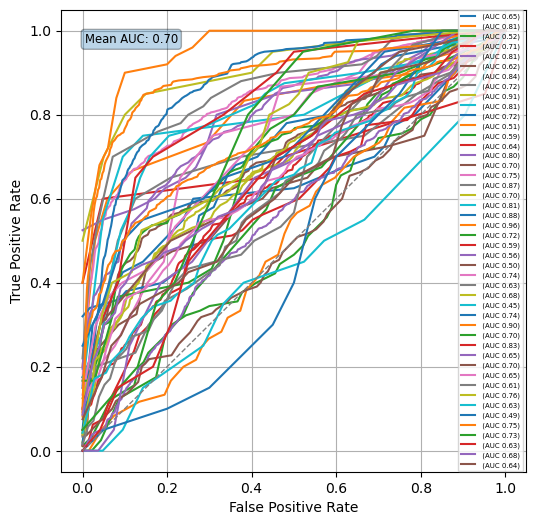

In [18]:
from tcrtrifold.graph_utils import plot_auc_per_antigen

plot_auc_per_antigen(
    auc,
)